In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp as exp
from MODS.IDnumbers import IDnumbers
%matplotlib inline

In [2]:
# Plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
# Set-up Plotly
tls.set_credentials_file(username="jclasul", api_key="MKXHNoKq9cRqNshsRQlh")
tls.set_config_file(sharing="public")

# Set-up IDnumbers
WriteIO = IDnumbers()

In [4]:
HR = pd.read_csv("HRIN.csv")

# Drop useless variables
# find way to automate without looking at plots
HR.drop(["EmployeeCount","Over18","StandardHours"], axis = 1, inplace=True)

# 35 variables for 1470 persons before drops
HR.shape

(1470, 32)

In [5]:
# List all variables and data types
HR.dtypes.value_counts()

int64     24
object     8
dtype: int64

In [6]:
# Dealing with CATEGORICAL variables
# # # # # # # # # # # #
# Method 1:
# One-Hot encoding
# # # # # # # # # # # #

recast = pd.get_dummies(HR, sparse=True, drop_first=True)
recast_corr = pd.DataFrame.dropna(recast.corr(), axis=[0,1],how="all")

# # # # # # # # # # # #
# Method 2:
# Label Encoding
# # # # # # # # # # # #
#
# Convert all Object dtypes to Categorical

def TO_CAT(col):
    if col.dtype == "object":
        return col.astype("category").cat.codes
    else:
        return col
    
encoding = HR.apply(TO_CAT, axis=0)
encoding_corr = pd.DataFrame.dropna(encoding.corr(), axis=[0,1],how="all")

In [7]:
# Plotly CONTOUR map
# 
# values have to be in LIST for PLOTLY, convert tolist and use COLUMN names for axis
# 

py.iplot([go.Contour(z=recast_corr.values.tolist(),
                   x=recast_corr.columns.tolist(),
                   y=recast_corr.columns.tolist())])

In [8]:
# Plotly CONTOUR map
# 
# values have to be in LIST for PLOTLY, convert tolist and use COLUMN names for axis
# 

py.iplot([go.Contour(z=encoding_corr.values.tolist(),
                   x=encoding_corr.columns.tolist(),
                   y=encoding_corr.columns.tolist())])

In [9]:
# Plotting Function
# Using Encoded labels
#
# To Add: Category names !!
#
def GET_CAT(COLUMN):
    CCDict = {}
    if HR[COLUMN].dtype == 'O': 
        CCats = HR[COLUMN].astype("category").cat.categories.tolist()
        for i,CCat in enumerate(CCats):
            CCDictUpdate = {CCat: i}
            CCDict.update(CCDictUpdate)
        return CCDict
            

def MakeGraph(DATA,INPUT,RESPONSE="Attrition"):
    for VARIABLE in INPUT:
        if VARIABLE == RESPONSE:
            continue
            
        sns.set_style("whitegrid")
        sns.set_palette("muted")
        plt.figure(figsize=(12,5))
        plt.suptitle("{:s} and {:s} graphs".format(VARIABLE,RESPONSE), fontsize="x-large")

        p1 = plt.subplot(2,2,2)
        sns.boxplot(y=DATA[RESPONSE], x=DATA[VARIABLE], orient="h")
        plt.legend()

        p2 = plt.subplot(2,2,4, sharex=p1)
        if RESPONSE == "Attrition":
            sns.distplot(DATA.loc[DATA[RESPONSE] == 0][VARIABLE], label="Stayed")
            sns.distplot(DATA.loc[DATA[RESPONSE] == 1][VARIABLE], label="Left")               
        plt.ylabel("Probability Density")
        plt.legend()

        p3 = plt.subplot(1,2,1)
        sns.pointplot(x=DATA[RESPONSE],y=DATA[VARIABLE], capsize = 0.2)
        plt.show()
        print(GET_CAT(VARIABLE))       

In [10]:
DATA = encoding
INPUT = pd.DataFrame.select_dtypes(DATA, exclude=["object"]).columns
RESPONSE = "Attrition"

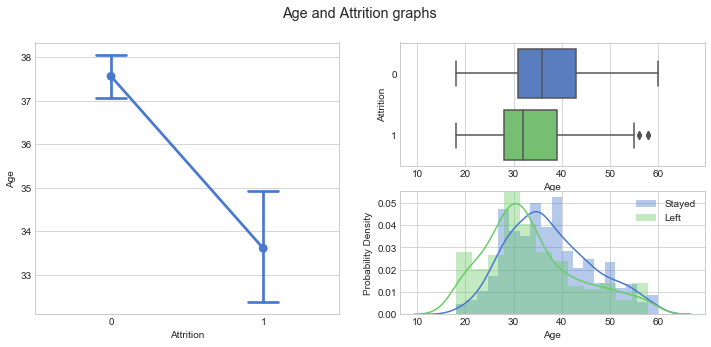

None


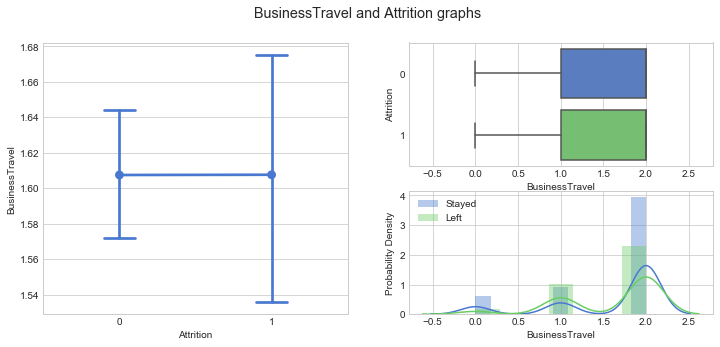

{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}


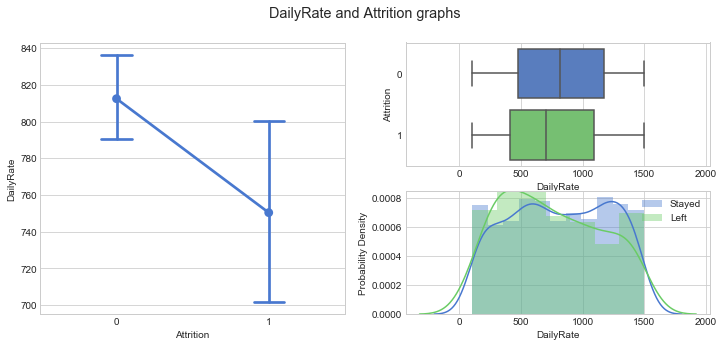

None


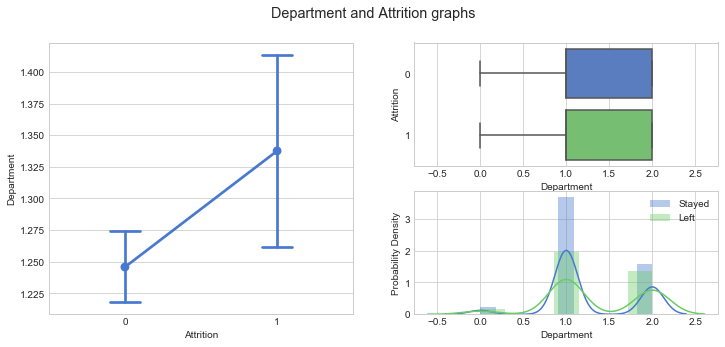

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}


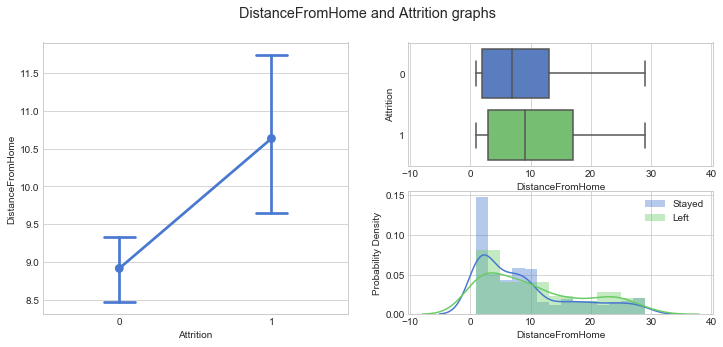

None


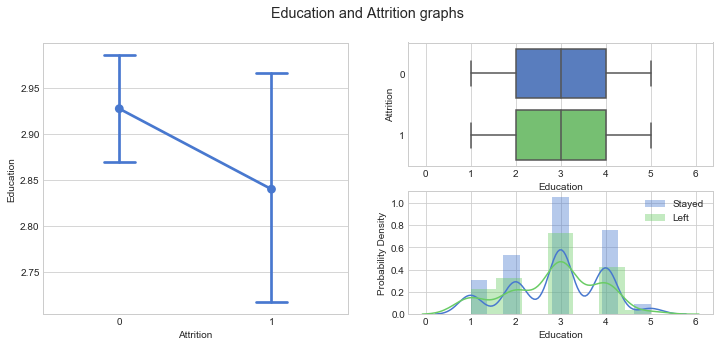

None


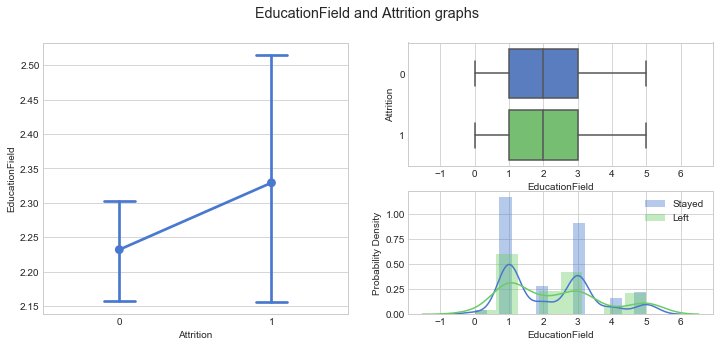

{'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}


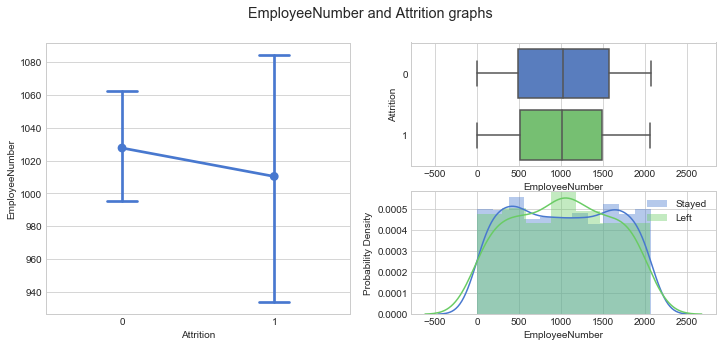

None


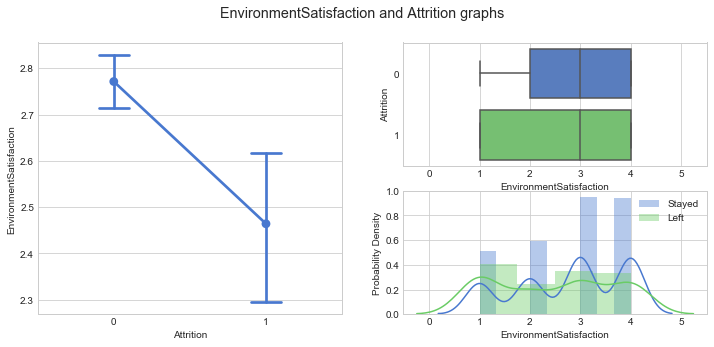

None


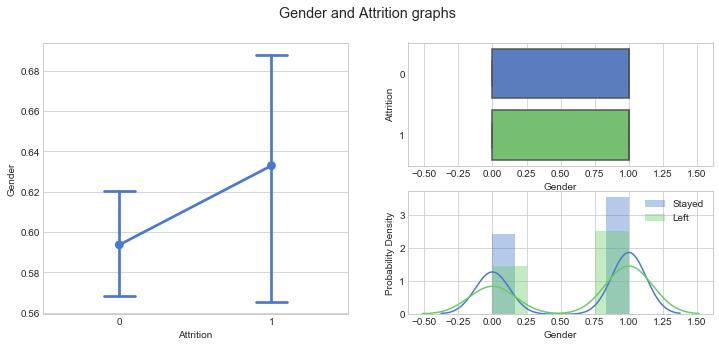

{'Female': 0, 'Male': 1}


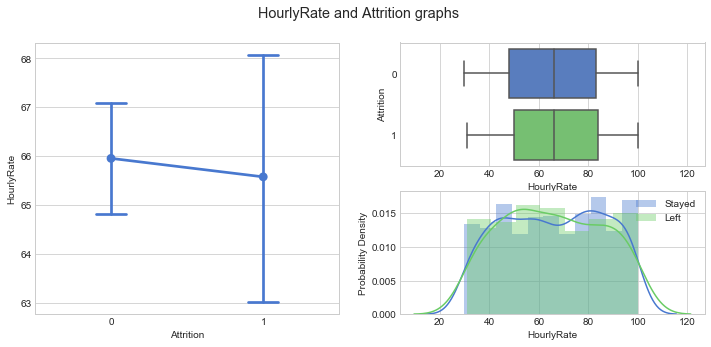

None


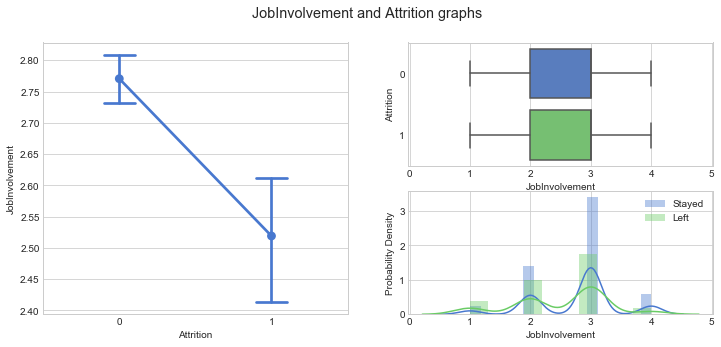

None


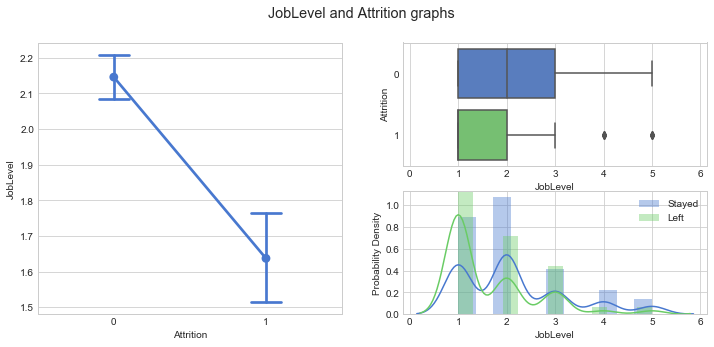

None


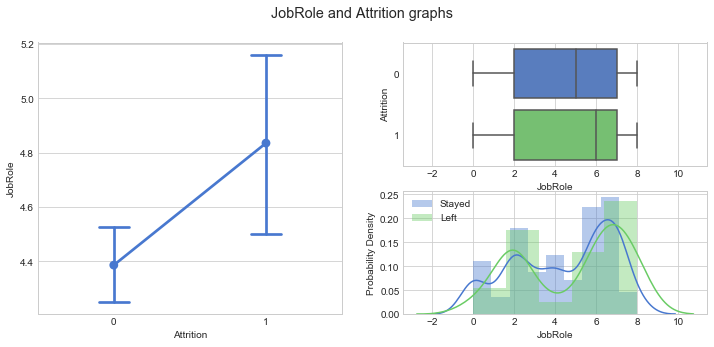

{'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}


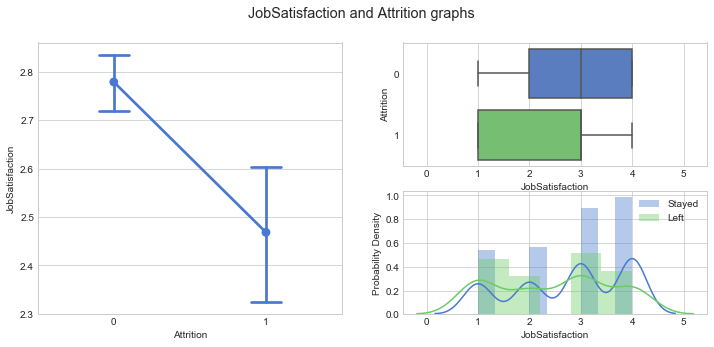

None


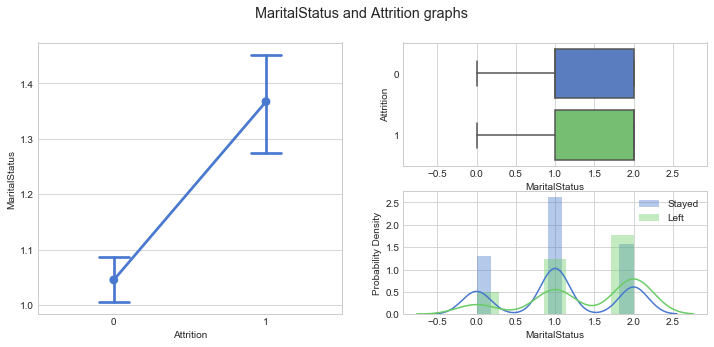

{'Divorced': 0, 'Married': 1, 'Single': 2}


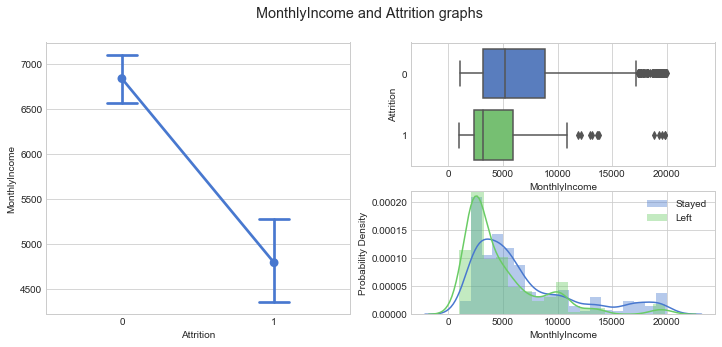

None


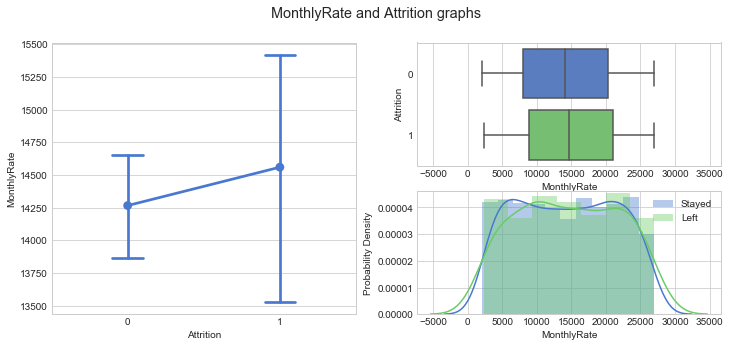

None


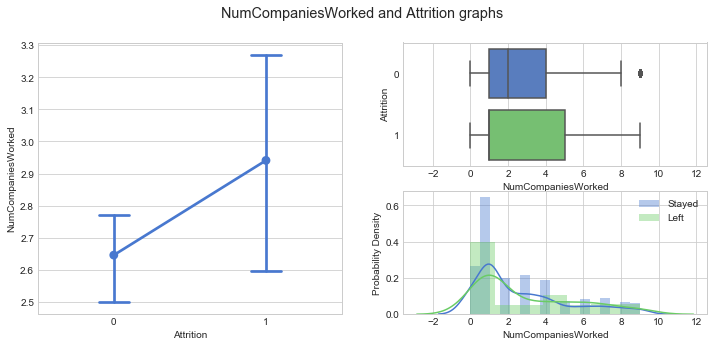

None


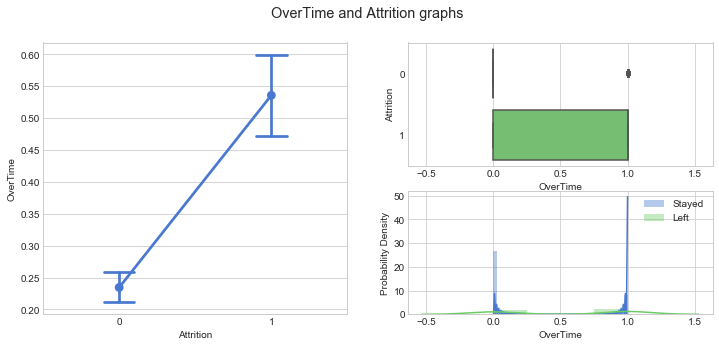

{'No': 0, 'Yes': 1}


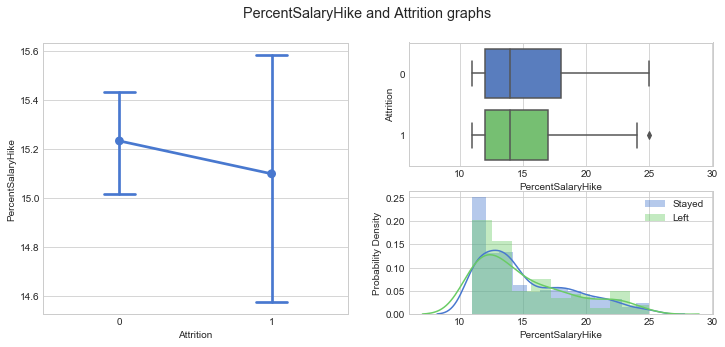

None


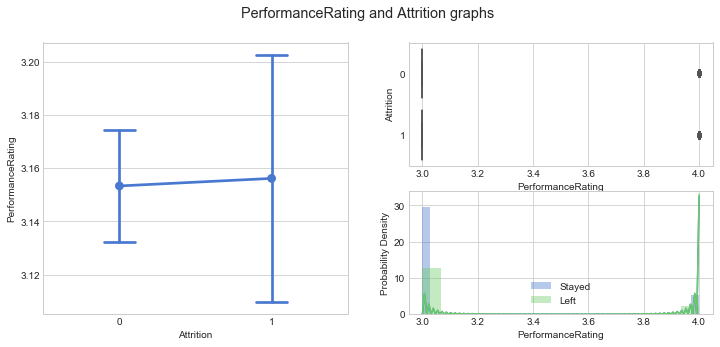

None


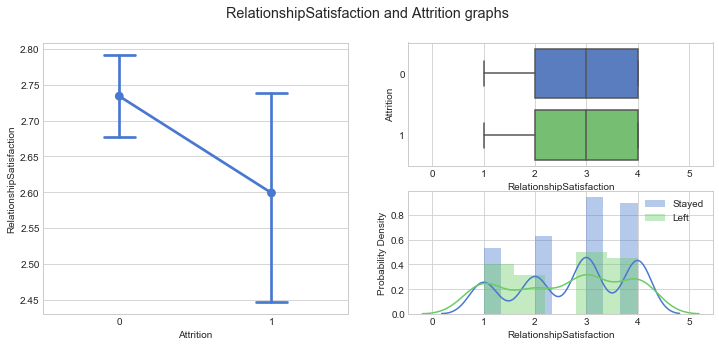

None


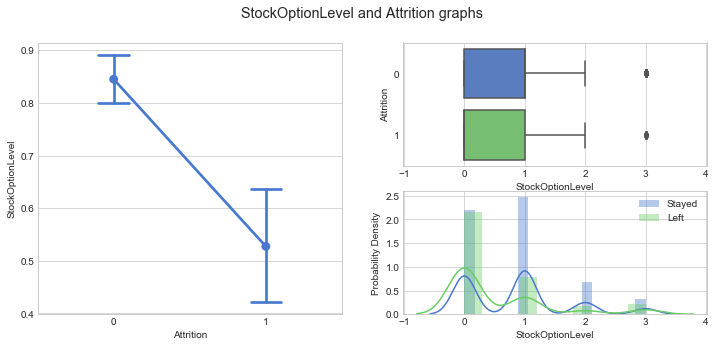

None


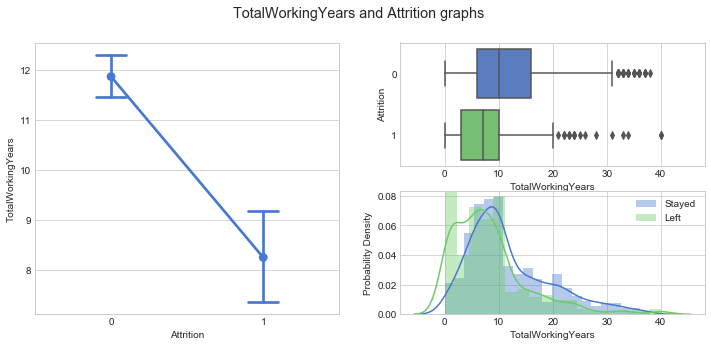

None


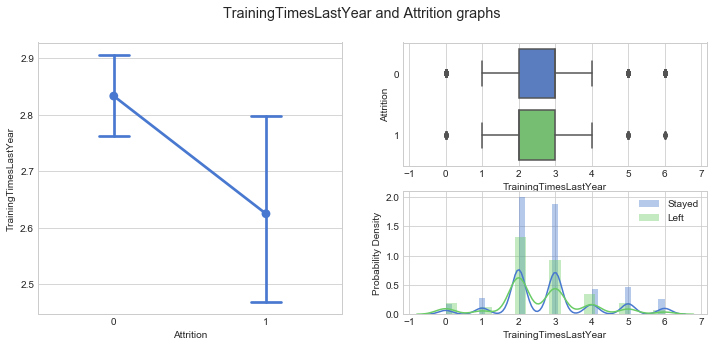

None


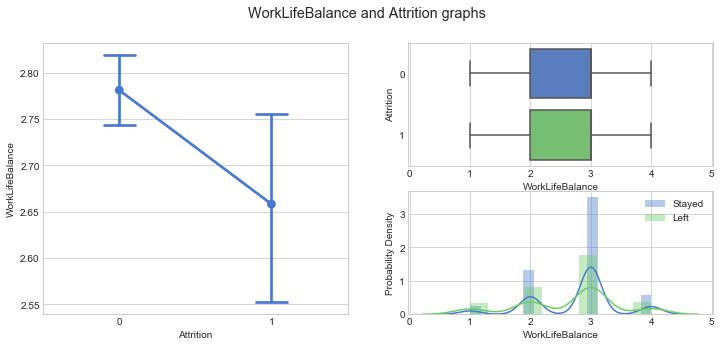

None


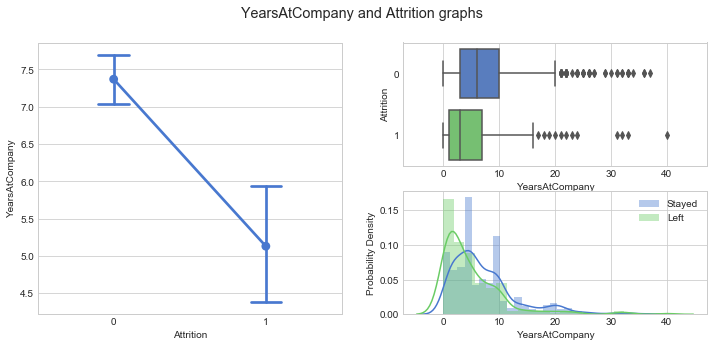

None


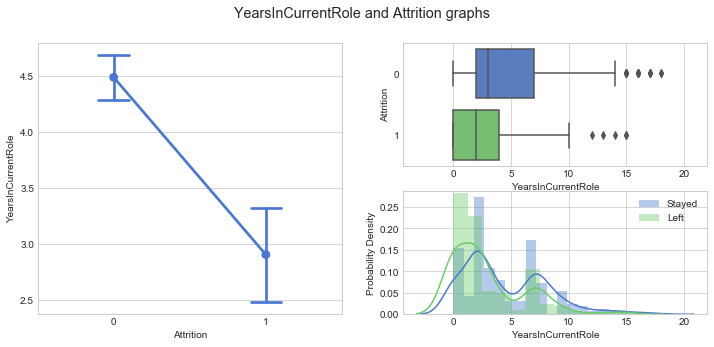

None


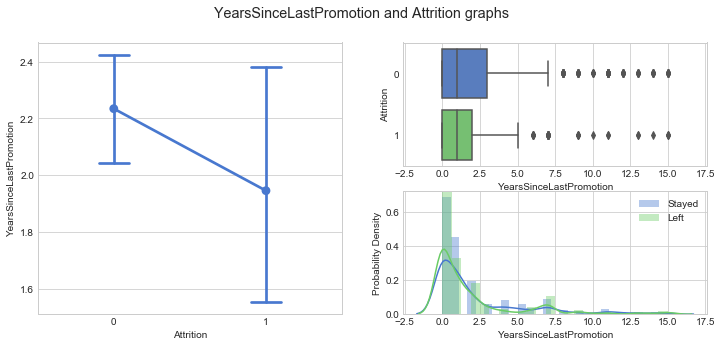

None


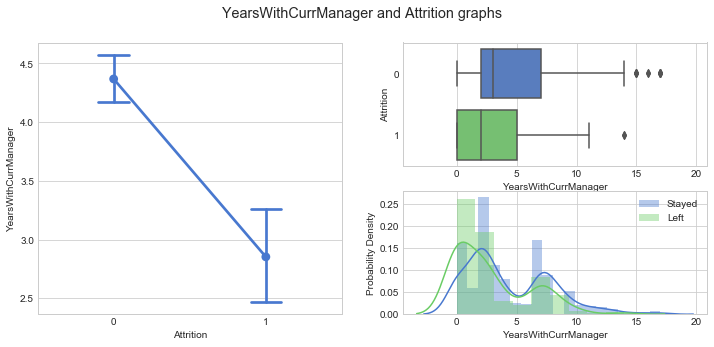

None


In [11]:
# CREATE graphs
#

MakeGraph(DATA,INPUT,RESPONSE)

In [12]:
# START machine learning
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

# XGBoost
from xgboost import XGBClassifier, plot_tree

import graphviz

# something
# something else
# finish

In [13]:
# Functions::
#
def SPLIT_DATA(DATA=encoding, RAND=True, Testsize=0.3):
    x_train, x_test, y_train, y_test = train_test_split(DATA.drop("Attrition",axis=1), 
                                                        DATA["Attrition"], test_size = Testsize)
    
    if RAND == True:
        list_of_random_items = GET_RANDOM(DATA=x_train)
        #x_train.drop(list_of_random_items, axis = 1, inplace= True)

        [DataSet.drop(list_of_random_items, axis = 1, inplace = True) for DataSet in [x_train,x_test]]
    
    return x_train, x_test, y_train, y_test

# RANDOM variable selection
def GET_RANDOM(DATA):
    group_of_items = set(DATA.columns)
    num_to_select = np.random.randint(1,len(group_of_items))
    list_of_random_items = random.sample(group_of_items, num_to_select)
    
    return list_of_random_items

# TO:DO
# IMPROVE only MODEL initiation changes, reduce code
#

def TRAIN_MODEL_LOG(RAND=True, Testsize=0.3):
    # SPLIT Data, using CALL SPLIT_DATA function
    # To include ALL variables select RAND = False
    # Testsize default = 0.3
    x_train, x_test, y_train, y_test = SPLIT_DATA(RAND=RAND, Testsize=Testsize)
    
    # USE LogisticRegression from SKLEARN
    model = LogisticRegression()    
    # FIT the model with training input
    model.fit(x_train,y_train)  
    
    # PREDICT using LRM with test data set
    PREDICTIONS = model.predict(x_test)
    
    # evaluate predictions 
    accuracy = accuracy_score(y_test,PREDICTIONS)
    # CALL ConfMatrix function
    ConfMatrix, INCORRECT_T1, INCORRECT_T2 = CONF_MATRIX(y_test, PREDICTIONS)
    
    OUTLIST = [accuracy, INCORRECT_T1, INCORRECT_T2, len(x_train.columns), x_train.columns.tolist(), ConfMatrix.flatten()]    
    return OUTLIST   

def TRAIN_MODEL_XGBoost_1(RAND=True, Testsize=0.3):
    # SPLIT Data, using CALL SPLIT_DATA function
    # To include ALL variables select RAND = False
    # Testsize default = 0.3
    x_train, x_test, y_train, y_test = SPLIT_DATA(RAND=RAND, Testsize=Testsize)
    
    # USE XGBClassifier from XGBoost
    model = XGBClassifier()
    # FIT the model with training input
    model.fit(x_train,y_train)
 
    # make predictions for test data
    PREDICTIONS = model.predict(x_test)
    # PREDICTIONS = [round(value) for value in y_pred]

    # evaluate predictions
    accuracy = accuracy_score(y_test, PREDICTIONS)
    # CALL ConfMatrix function
    ConfMatrix, INCORRECT_T1, INCORRECT_T2 = CONF_MATRIX(y_test, PREDICTIONS)    
    
    OUTLIST = [accuracy, INCORRECT_T1, INCORRECT_T2, len(x_train.columns), x_train.columns.tolist(), ConfMatrix.flatten()]    
    return OUTLIST   

## END TO:DO

def CONF_MATRIX(y_test, PREDICTIONS):
    # CREATE confusion matrix and get TI TII errors
    ConfMatrix = confusion_matrix(y_test, PREDICTIONS)
    # CALL TI TII function
    INCORRECT_T1,INCORRECT_T2 = TITII(DATA = ConfMatrix)
    
    return ConfMatrix, INCORRECT_T1, INCORRECT_T2

def TITII(DATA):
    CORRECT_TRUE = DATA[-1,-1]/DATA[-1,:].sum()
    INCORRECT_T2 = 1-CORRECT_TRUE
    CORRECT_FALSE = DATA[0,0]/DATA[0,:].sum()
    INCORRECT_T1 = 1-CORRECT_FALSE
    
    return INCORRECT_T1,INCORRECT_T2  

# Change colour palette
def MAKE_HM(MODEL_NAME, ConfMatrix = None, y_test = None, PREDICTIONS = None, Score="Not Given"):
    plt.figure(figsize=(5,5))
    if ConfMatrix is None:
        ConfMatrix, INCORRECT_T1, INCORRECT_T2 = CONF_MATRIX(y_test,PREDICTIONS)
    else:
        ConfMatrix = ConfMatrix.reshape(2,2)
        INCORRECT_T1,INCORRECT_T2 = TITII(ConfMatrix)
    
    sns.heatmap(ConfMatrix, annot=True, fmt=".3f", linewidths=1, square=True, cmap="icefire", cbar=False) 
    
    # LABELS & TITLES
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    plt.suptitle("The Score for the {} is : {}, Type II : {}".format(MODEL_NAME,Score,INCORRECT_T2))
    plt.show()    

In [14]:
# RUN Models n-times
# TO:DO find run-time for each function call and optimize
# WriteIO operations probabely take long

ModelResults = []
for i in range(0,100):    
#     ModelResults.append(TRAIN_MODEL_LOG())
    if i % 250 == 0:
        print(i)
    
    # Store on local drive in case of crashes
    WriteIO.GetFile(Mode="a", WriteString = TRAIN_MODEL_LOG(), FileName="IDnumbers_LRM_T1")
    WriteIO.GetFile(Mode="a", WriteString = TRAIN_MODEL_XGBoost_1(), FileName="IDnumbers_XGB_T1")
    
#ModelResults[4] = ModelResults[3].str.len()

0


In [15]:
# READ in modelling results
# PLOT accuracy scores, TII errors and NVars

def MODEL_EVAL(MODEL_NAME):
    SCORES = []
    with open(MODEL_NAME) as f:
        for line in f:
            line_data = [line for line in line.split(",")]
            SCORE = [float(scores.strip("[]").strip("'")) for scores in line_data[0:4]]
            SCORES.append(SCORE)  

    SCORES = pd.DataFrame(SCORES)
    SCORES.rename(columns={0:"Score", 1:"Error1",2:"Error2",3:"NVars"}, inplace=True)

    # GRAPH
    plt.figure(figsize=(5,5))

    SCORES.groupby("NVars")[["Score","Error2"]].median().plot()
    plt.suptitle("Median Score and Error2 for {}".format(MODEL_NAME))
    plt.show()

    print("Total runs : {}".format(len(SCORES.Score)))

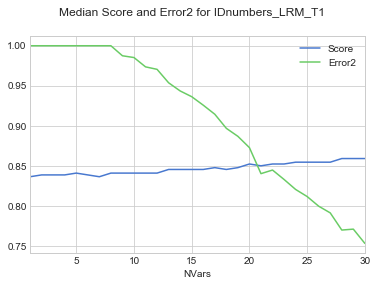

Total runs : 10315


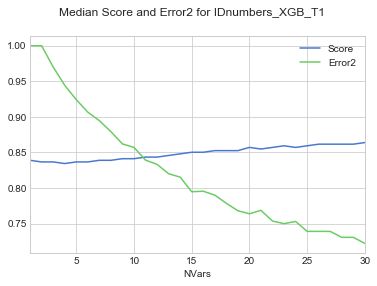

Total runs : 10312


In [16]:
MODEL_EVAL("IDnumbers_LRM_T1")
MODEL_EVAL("IDnumbers_XGB_T1")

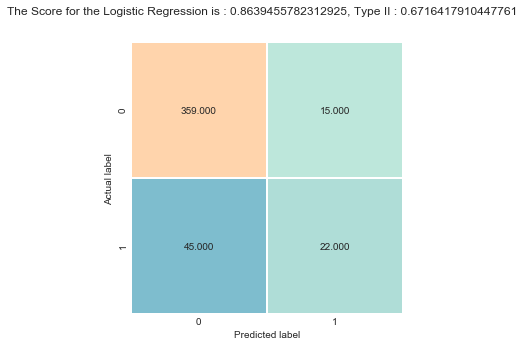

Total Variables : 31


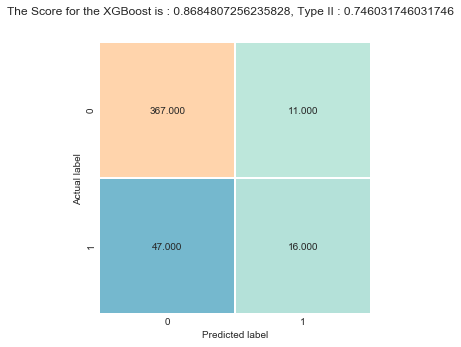

Total Variables : 31


In [17]:
# FULL MODEL
# ALL 30 variables:
# Logistic Regression

# TO:DO change colour palette

LRM = TRAIN_MODEL_LOG(RAND=False)
MAKE_HM("Logistic Regression",ConfMatrix=LRM[5], Score=LRM[0])
print("Total Variables : {}".format(LRM[3]))

# XGBoost classifier
XGBoost_1 = TRAIN_MODEL_XGBoost_1(RAND=False)
MAKE_HM("XGBoost", XGBoost_1[5], Score=XGBoost_1[0])
print("Total Variables : {}".format(XGBoost_1[3]))

In [18]:
# Plot Decision tree
# Very large, hard to "interpret"

from sklearn.datasets import load_iris
from sklearn import tree

x_train, x_test, y_train, y_test = SPLIT_DATA(RAND=False)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [19]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=x_train.columns.tolist(),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("SKDT") 
graph.save("SKDT")

'SKDT'

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [22]:
# shuffle and split training and test sets
x_train, x_test, y_train, y_test = SPLIT_DATA()

In [23]:
# USE LogisticRegression from SKLEARN
model = LogisticRegression()    
# FIT the model with training input
y_score = model.fit(x_train,y_train).decision_function(x_test)

In [24]:
# USE LogisticRegression from SKLEARN
model = LogisticRegression()    
# FIT the model with training input
model.fit(x_train,y_train)
y_score = model.fit(x_train,y_train).decision_function(x_test)

# PREDICT using LRM with test data set
PREDICTIONS = model.predict(x_test)

# evaluate predictions 
accuracy = accuracy_score(y_test,PREDICTIONS)
# CALL ConfMatrix function
ConfMatrix, INCORRECT_T1, INCORRECT_T2 = CONF_MATRIX(y_test, PREDICTIONS)

In [25]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
i = "Vals"
fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
roc_auc[i] = auc(fpr[i], tpr[i])

In [26]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

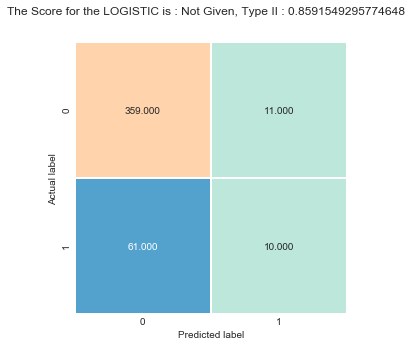

In [27]:
MAKE_HM("LOGISTIC", ConfMatrix=ConfMatrix)

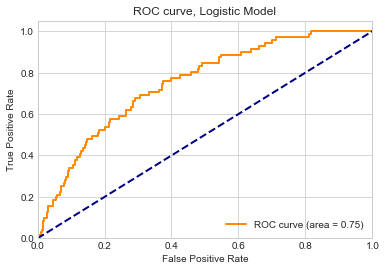

In [28]:
plt.figure()
lw = 2
i = "micro"
plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, Logistic Model')
plt.legend(loc="lower right")
plt.show()